В этом задании изобразим решающую поверхность для классификатора kNN. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV

In [ ]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


In [ ]:
print(data.isnull().sum())
data = data.dropna()

print(data.dtypes)

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64
Species                 object
Island                  object
Clutch Completion       object
Date Egg                 int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object


`Species`,`Island`,`Sex`, `Clutch Completion` - категориальные признаки
Для `Species` и `Island` можно использовать `one-hot encoding`, а для `Sex` и `Clutch Completion` можно просто заменить на True и False в одном столбце

In [ ]:
data = pd.get_dummies(data, columns=['Island'], prefix=['Island'], drop_first=True)
data['Sex'] = (data['Sex'] == 'MALE').astype(bool)
data['Clutch Completion'] = (data['Clutch Completion'] == 'Yes').astype(bool)
data.head(10)

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen
0,Chinstrap,True,382,50.9,19.1,196.0,3550.0,True,10.02372,-24.86594,True,False
1,Chinstrap,True,741,45.2,17.8,198.0,3950.0,False,8.88942,-24.49433,True,False
2,Gentoo,True,744,46.5,13.5,210.0,4550.0,False,7.99530,-25.32829,False,False
3,Chinstrap,True,10,45.2,16.6,191.0,3250.0,False,9.62357,-24.78984,True,False
4,Gentoo,True,13,48.4,14.4,203.0,4625.0,False,8.16582,-26.13971,False,False
5,Gentoo,True,22,48.1,15.1,209.0,5500.0,True,8.45738,-26.22664,False,False
6,Gentoo,True,13,51.1,16.5,225.0,5250.0,True,8.20660,-26.36863,False,False
7,Gentoo,False,392,42.7,13.7,208.0,3950.0,False,8.14567,-26.59467,False,False
8,Adelie,True,14,39.6,20.7,191.0,3900.0,False,8.80967,-26.78958,False,False
9,Gentoo,True,735,46.1,13.2,211.0,4500.0,False,7.99300,-25.51390,False,False


In [ ]:
encoder = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
data['Species'] = encoder.fit_transform(data[['Species']])

X = data.drop(columns=['Species'])
y = data['Species']

In [ ]:
np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

Если в выборке классы целевой переменной (Species) распределены неравномерно, то при случайном разбиении может получиться, что в обучающей или тестовой выборке окажется больше или меньше представителей какого-то класса.

stratify=y гарантирует, что распределение классов в обучающей и тестовой выборке будет таким же, как в исходных данных. Это особенно важно для дисбалансных классов, чтобы избежать перекоса в модели

На тренировочной выборке обучиv шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставим равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25. Для обучения используем только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние.

In [ ]:
features = ['Species', 'Flipper Length (mm)', 'Body Mass (g)']
data1 = data[features]
X, y = data1.drop(columns=['Species']), data1['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neighbors = [1, 3, 5, 10, 15, 25]
cl_sp = []
print("NN \t Train \t Test")

for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors=i, p=2)
    clf.fit(X_train_scaled, y_train)

    y_train_pred = clf.predict(X_train_scaled)
    y_test_pred = clf.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    cl_sp.append(clf)

    print(f"{i}\t{train_acc:.4f}\t{test_acc:.4f} ")

NN 	 Train 	 Test
1	0.9648	0.7857 
3	0.8590	0.7959 
5	0.8590	0.8061 
10	0.8282	0.7857 
15	0.8282	0.8061 
25	0.8194	0.8469 


In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

 Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов.

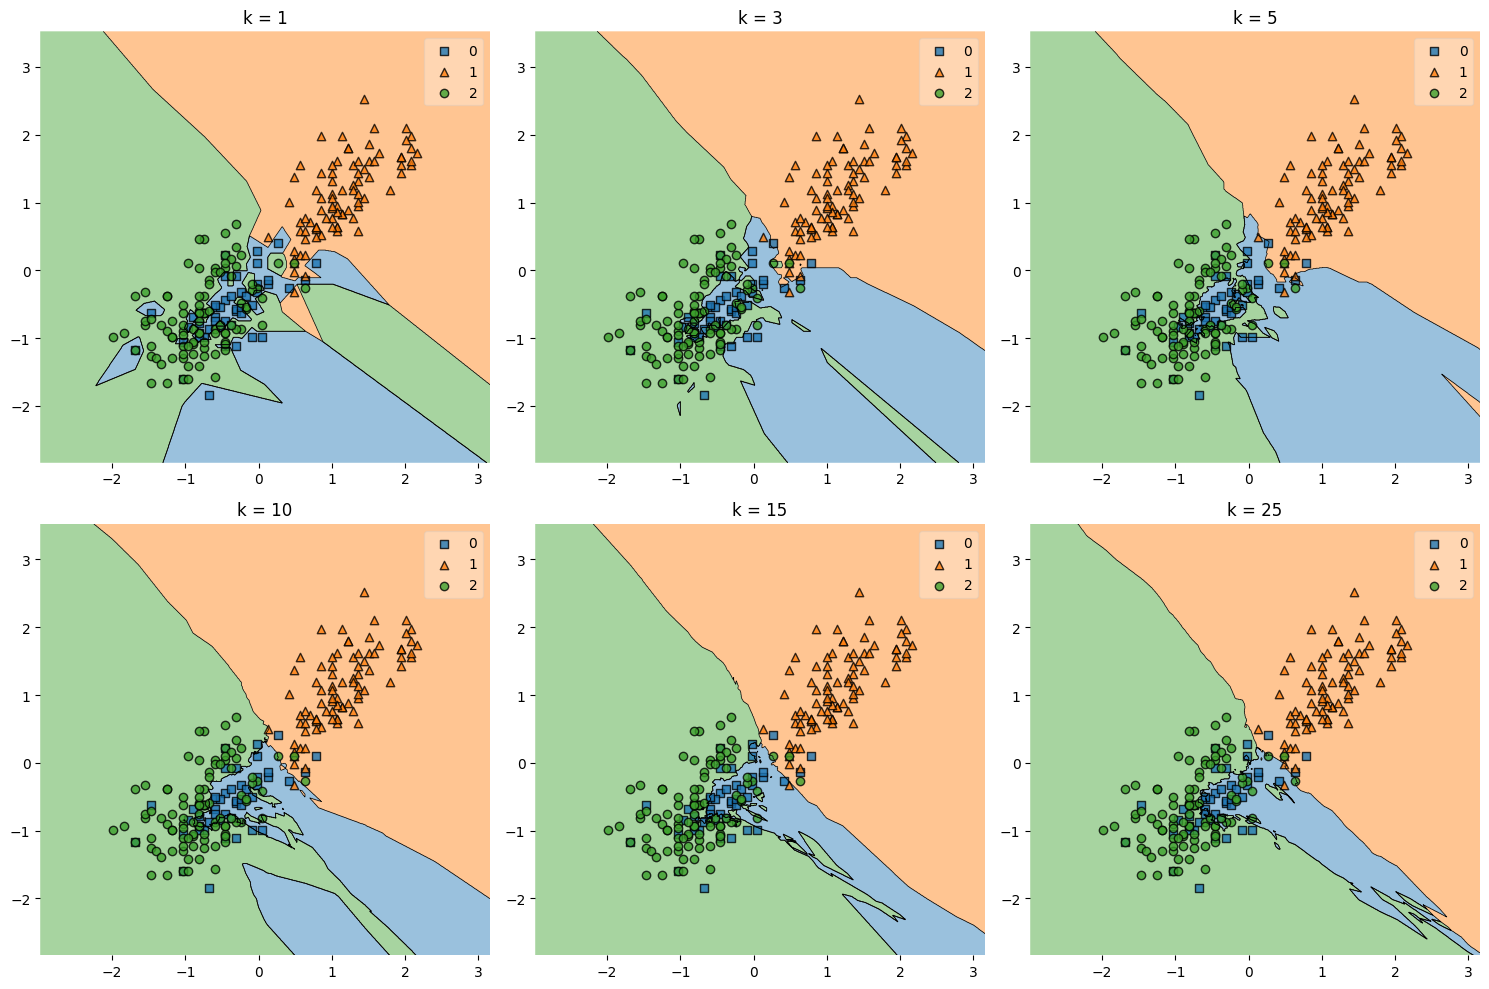

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for idx, (clf, ax, k) in enumerate(zip(cl_sp, axes, neighbors)):
    plot_decision_regions(X_train_scaled, y_train.values.astype(np.int_), clf=clf, ax=ax)
    ax.set_title(f"k = {k}")

plt.tight_layout()
plt.show()

При k=1 модель переобучена, так как accuracy на train значитльно больше, чем на test, при остальных k показатель accuracy ведет себя нормально, при k = 25 достигает максимального значения на test, это также можно заметить на графигах, та как при k = 25 данные хорошо разграничены

 В данном задании попробуем реализовать алгоритм KNN своими руками, делать будем KNN именно для классификации.


In [ ]:
class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
      predictions = []
      for x in X:
          distances = self.count_distance(x)
          ind = np.argsort(distances)[:self.k]
          nearest = self.y_train[ind]
          result = Counter(nearest).most_common(1)[0][0]
          predictions.append(result)

      return np.array(predictions)

    def count_distance(self, x):
      return np.linalg.norm(self.X_train - x, axis=1)

In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

Протестируем наш алгоритм на данных о пингвинах.

In [ ]:
for k in neighbors:
    knn = KNN(k=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{k} \t {acc:.4f}")

1 	 0.7857
3 	 0.7857
5 	 0.7959
10 	 0.7959
15 	 0.8061
25 	 0.8469


Лучшее k: 25 с точностью 0.8469 на test.

### Линейная регрессия

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

In [ ]:
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками.

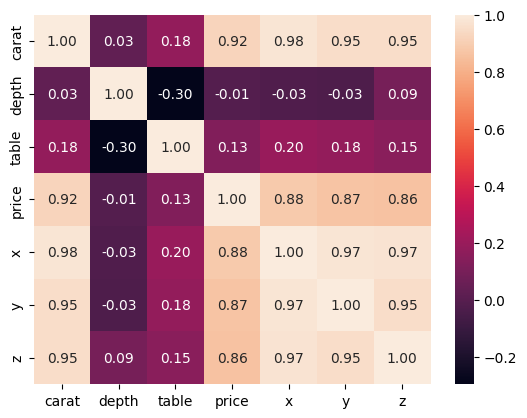

In [ ]:
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(),annot=True, fmt="0.2f");

Наибольшую корреляцию имеют `x`, `y`, `z` и `carat`

 Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируем категориальные признаки методом OneHot-кодирования (`pd.get_dummies()`).

In [ ]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
np.random.seed(100)
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train, mse_test

(1277734.222188422, 1275985.7063967127)

In [ ]:
coefficients = model.coef_
names = data.columns
for i in zip(coefficients, names):
  print(f'{i[1]}: \t\t {i[0]}')

carat: 		 5432.175374904124
depth: 		 -88.90711707849414
table: 		 -55.79700487426145
price: 		 -1195.9915853908512
x: 		 19.54461474098192
y: 		 -61.81543665679182
z: 		 183.79421116818514
cut_Good: 		 442.99373763266965
cut_Ideal: 		 362.19086477436883
cut_Premium: 		 330.9711109558848
cut_Very Good: 		 -76.59752324466628
color_E: 		 -89.79714067043734
color_F: 		 -186.22117766360415
color_G: 		 -344.4075034469094
color_H: 		 -435.13733284487006
color_I: 		 -528.3300250668759
color_J: 		 938.555242442039
clarity_IF: 		 1556.4625321239998
clarity_SI1: 		 1003.6268865598423
clarity_SI2: 		 1636.0362808180776
clarity_VS1: 		 1769.598950807534
clarity_VS2: 		 1250.3435744322426
clarity_VVS1: 		 1441.1681731022752


оценки `carat`, `color_J` и все типы `clarity` сильно превышают остальные переменные

 Как можно заметить из анализа корреляционной матрицы, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучим Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10.

In [ ]:
lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train_scaled, y_train)
lasso_coefs = lasso_model.coef_

ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train_scaled, y_train)
ridge_coefs = ridge_model.coef_
print('Lasso')
for i in zip(lasso_coefs, names):
  print(f'{i[1]}: \t\t {i[0]}')
print('Ridge')
for i in zip(ridge_coefs, names):
  print(f'{i[1]}: \t\t {i[0]}')

Lasso
carat: 		 4892.633346178294
depth: 		 -90.08611041994189
table: 		 -65.46445770839235
price: 		 -674.3727831572986
x: 		 -0.0
y: 		 -68.77203556991623
z: 		 58.72138108618494
cut_Good: 		 237.17754523108806
cut_Ideal: 		 176.21258091176873
cut_Premium: 		 159.787366636284
cut_Very Good: 		 -4.6494340931500675
color_E: 		 -23.595205167245297
color_F: 		 -107.93706452280139
color_G: 		 -271.08511755629485
color_H: 		 -361.9333972088662
color_I: 		 -466.6433610224416
color_J: 		 625.3103496015999
clarity_IF: 		 817.2028604157056
clarity_SI1: 		 361.8347608121345
clarity_SI2: 		 1008.2179557323135
clarity_VS1: 		 1047.6888342158052
clarity_VS2: 		 811.4324067200996
clarity_VVS1: 		 932.0583635488304
Ridge
carat: 		 5388.4221643514475
depth: 		 -85.03248045322864
table: 		 -55.93628927792406
price: 		 -1135.8866235323349
x: 		 18.42196172190499
y: 		 -79.09319014662015
z: 		 184.34207498808323
cut_Good: 		 444.0849144896302
cut_Ideal: 		 363.0798956585037
cut_Premium: 		 332.283198899

С помощью Lasso веса значительно уменьшились, а вот при использовании Ridge веса практически не изменились, значит проблема мультиколлинеарности была не очень сильной.


Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучим Lasso- и Ridge-регрессии и построим график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.



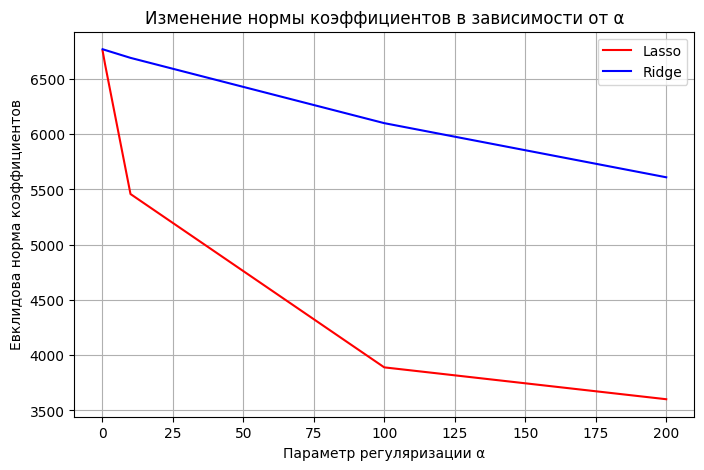

In [ ]:
alphas = [0.1, 1, 10, 100, 200]

lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)

    lasso.fit(X_train_scaled, y_train)
    ridge.fit(X_train_scaled, y_train)

    lasso_norms.append(np.linalg.norm(lasso.coef_))
    ridge_norms.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(8, 5))
plt.plot(alphas, lasso_norms, label="Lasso", color='red')
plt.plot(alphas, ridge_norms, label="Ridge", color='blue')

plt.xlabel("Параметр регуляризации α")
plt.ylabel("Евклидова норма коэффициентов")
plt.title("Изменение нормы коэффициентов в зависимости от α")
plt.legend()
plt.grid(True)
plt.show()

Метод Lasso намного сильнее снижает норму коэффициентов, поэтому его используют для отбора признаков, Lasso зануляет малозначимые коэффициенты, оставляя только важные признаки

В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.


In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

mean_mse = lasso_cv.mse_path_ .mean(axis=1)

optimal_alpha = lasso_cv.alpha_
print('alpha \t mse')
for a, mse in zip(lasso_cv.alphas_, mean_mse):
    print(f"{a} \t {mse:.4f}")

alpha 	 mse
200.0 	 2152615.1197
100.0 	 1783111.0146
10.0 	 1344453.3640
1.0 	 1283576.0544
0.1 	 1284044.5766


Oптимальное значение alpha  = 1

 Обучим итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке.

In [ ]:
lasso_new = Lasso(alpha=1)
lasso_new.fit(X_train_scaled, y_train)
lasso_coef = lasso_final.coef_

for i, coef in zip(data.columns, lasso_coef):
    print(f"{i}: {coef:.4f}")


carat: 5380.0716
depth: -90.9883
table: -56.8618
price: -1142.7312
x: 0.0000
y: -48.3207
z: 171.6218
cut_Good: 422.8593
cut_Ideal: 343.8876
cut_Premium: 314.3144
cut_Very Good: -69.3889
color_E: -83.1630
color_F: -178.3806
color_G: -337.0467
color_H: -427.8285
color_I: -522.1891
color_J: 906.8951
clarity_IF: 1481.8175
clarity_SI1: 938.8383
clarity_SI2: 1572.6615
clarity_VS1: 1696.6785
clarity_VS2: 1205.9765
clarity_VVS1: 1389.7351


`carat`(5380.07) - cамый важный признак(сильно влияет на целевую переменную)\
`clarity` со значениями от 938.8383 до 1696.6785 также имеет существенное влияние\
бриллианты с `color_J`(906.90) значимо отличаются по целевой переменной\
менее значимые признаки:
`depth`(-90.98), `table` (-56.86), `y`(-48.32), `cut_Very Good` (-69.38) их влияние минимально, но они не занулились\
`x`(0.00) совсем не влияет, его можно исключить


Сделаем предсказания обученной Lasso-регрессии на тестовой выборке и сравним среднеквадратичную ошибку с ошибкой обычной линейной регрессии.

In [ ]:
lasso_predictions = lasso_new.predict(X_test_scaled)
mean_squared_error(y_test, lasso_predictions), mse_test

(1275582.6195114497, 1275985.7063967127)

Ошибка в методе Lasso оказалась меньше,так как в данных есть признаки с низкой значимостью или мультиколлинеарность, и регуляризация помогает отбросить ненужные признаки